In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import time
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter

# Exploratory Data Analysis (EDA)

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Anomaly_Detection/Files/y_test.csv')

In [ ]:
y_train = y_train.values.reshape(-1, )
y_test = y_test.values.reshape(-1, )

In [60]:
acc = []
balanced_acc = []
precision = []
recall = []
f1 = []
time_to_train = []
time_to_predict = []

#Method

## Logistic Regression

In [61]:
start_time = time.time()
logisticregression = LogisticRegression(random_state=0)
logisticregression.fit(X_train, y_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(logisticregression, '/content/drive/MyDrive/Anomaly_Detection/Files/model/LogisticRegression_original.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/LogisticRegression_original.joblib']

In [62]:
start_time = time.time()
y_pred = logisticregression.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6049597,       0],
       [     30,       0]])

In [63]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [64]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


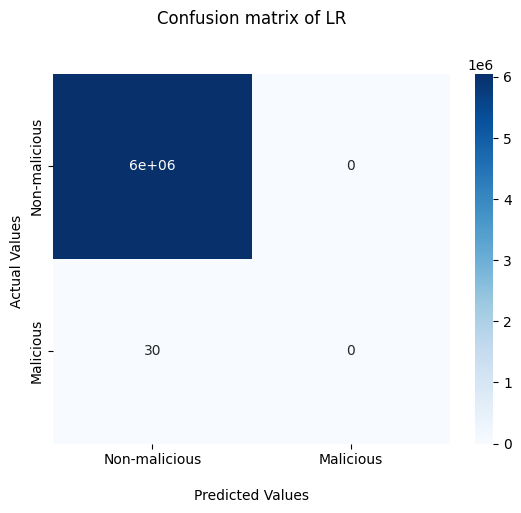

In [65]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of LR\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## Decision Tree

In [66]:
start_time = time.time()
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train, y_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(decisiontree, '/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_original.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/DecisionTreeClassifier_original.joblib']

In [67]:
start_time = time.time()
y_pred = decisiontree.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6049576,      21],
       [     30,       0]])

In [68]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [69]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

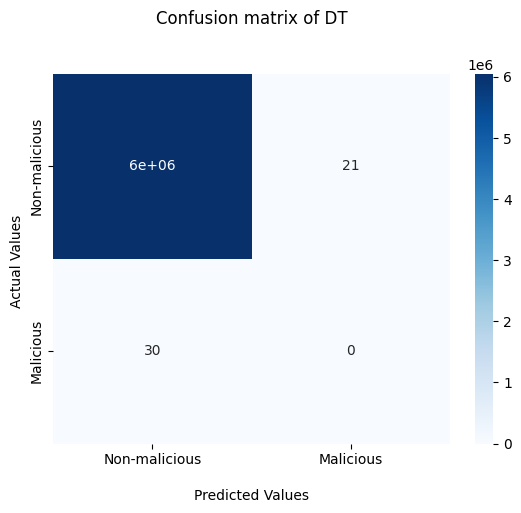

In [70]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of DT\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## SGD Classifier

In [71]:
start_time = time.time()
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(sgd, '/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_original.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/SGDClassifier_original.joblib']

In [72]:
start_time = time.time()
y_pred = sgd.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6049597,       0],
       [     30,       0]])

In [73]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [74]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


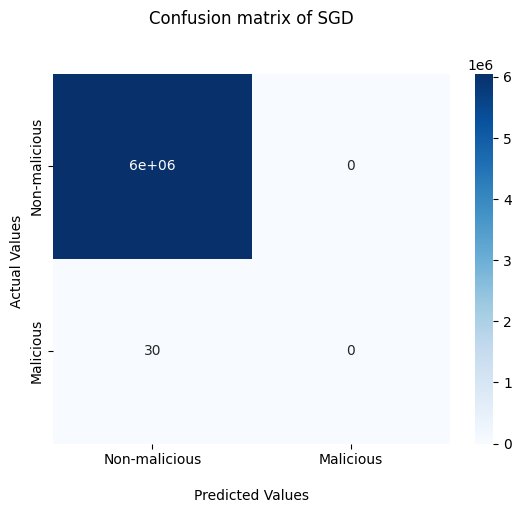

In [75]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of SGD\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()

## MLP Classifier

In [76]:
start_time = time.time()
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
end_time = time.time()
elapsed_time_train = end_time - start_time
joblib.dump(mlp, '/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_original.joblib')

['/content/drive/MyDrive/Anomaly_Detection/Files/model/MLPClassifier_original.joblib']

In [77]:
start_time = time.time()
y_pred = mlp.predict(X_test)
end_time = time.time()
elapsed_time_predict = end_time - start_time
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[6049597,       0],
       [     30,       0]])

In [78]:
time_to_train.append (elapsed_time_train)
time_to_predict.append (elapsed_time_predict)

In [79]:
acc.append(accuracy_score(y_test, y_pred))
balanced_acc.append(balanced_accuracy_score(y_test, y_pred))
precision.append(precision_score(y_test, y_pred, average='macro'))
recall.append(recall_score(y_test, y_pred, average='macro'))
f1.append(f1_score(y_test, y_pred, average='macro'))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


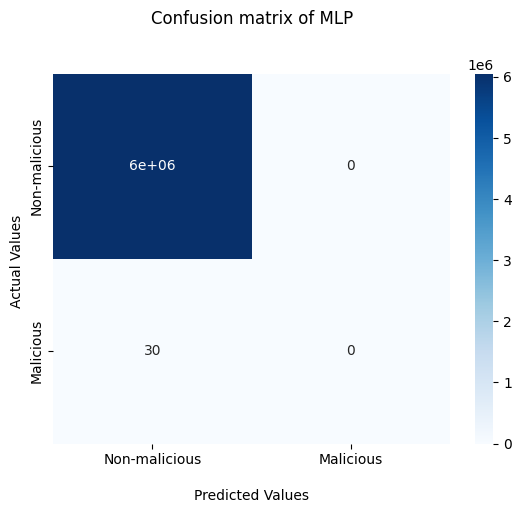

In [80]:
target_names = ['Non-malicious','Malicious']
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion matrix of MLP\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)

## Display the visualization of the Confusion Matrix.
plt.show()